На данной стадии это просто скопированная нейросеть, отличающая кошек от собак. Загрузите файл с названием 1 и форматом jpg, чтобы узнать, кошка на нём или собака.

Видео на Youtube: https://www.youtube.com/watch?v=PHdw0Uk_Lc4

Оригинальный код: https://colab.research.google.com/drive/10EGFrNyG5MiA14VGhdC_v8g19tFZKRA4#scrollTo=kzm2o-mXohDz

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
train, _ = tfds.load('cats_vs_dogs', split=['train[:100%]'], with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete5OIK3A/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [4]:
SIZE = 224
def resize_image(img, label):
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, (SIZE, SIZE))
  img = img / 255.0
  return img, label

In [5]:
train_resized = train[0].map(resize_image)
train_batches = train_resized.shuffle(1000).batch(16)

In [6]:
base_layers = tf.keras.applications.MobileNetV2(input_shape=(SIZE, SIZE, 3), include_top=False)
base_layers.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [7]:
model = tf.keras.Sequential([
                             base_layers,
                             GlobalAveragePooling2D(),
                             Dropout(0.2),
                             Dense(1)
])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [8]:
model.fit(train_batches, epochs=1)

1454/1454 [==============================] - 765s 522ms/step - loss: 0.0695 - accuracy: 0.9738


In [9]:
model.fit(train_batches, epochs=2)

Epoch 1/2
1454/1454 [==============================] - 740s 508ms/step - loss: 0.0462 - accuracy: 0.9825
Epoch 2/2
1454/1454 [==============================] - 736s 505ms/step - loss: 0.0416 - accuracy: 0.9851


In [23]:
files.upload()

Saving Cat.jpg to Cat (1).jpg


{'Cat.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\t\x07\x06\n\t\x08\t\x0b\x0b\n\x0c\x0f\x19\x10\x0f\x0e\x0e\x0f\x1e\x16\x17\x12\x19$ &%# #"(-90(*6+"#2D26;=@@@&0FKE>J9?@=\xff\xdb\x00C\x01\x0b\x0b\x0b\x0f\r\x0f\x1d\x10\x10\x1d=)#)==================================================\xff\xc2\x00\x11\x08\x03K\x04\x9c\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xfa09\xf4\x01\x80\x00\xd3@`\x86\x00\x00\x00\x0c\x00\x01\xa6\x0c\x10\x00\x00\x00\x01\x00\x08\x04\x02M(\x9c\x86O\x01`\xf9\x92y+\x0b\x918\'72\xa0J\x81 \x9a\x14\xb8\xb1CTZ\xa4,\xa9EP\xab:\x84R\xe6\x80,mT0\x00(\x9a\xa7R\xdb&\x86\x14P\xee):\xbd\x0f/\xbak\xd5\xea\xe0\xeb\xce\xbak**\x1ey\xa4\xa9\xce\x9c\xa9\xa3\r11\xe

1/1 [==============================] - 0s 52ms/step


Text(0.5, 1.0, 'СОБАКА 7.501765251159668')

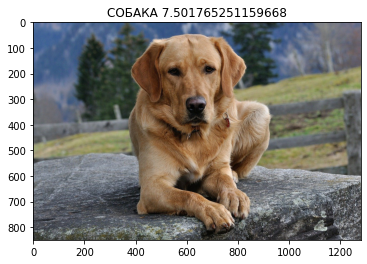

In [26]:
img = load_img(f'1.jpg')
img_array = img_to_array(img)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
pred_label = 'КОТ' if prediction < 0.5 else 'СОБАКА'
plt.figure()
plt.imshow(img)
plt.title(f'{pred_label} {prediction}')